<a href="https://colab.research.google.com/github/seifuntara/ds/blob/master/FP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Final Project: Badminton Match Outcome Prediction**🥇

The forecast of winners in sports brings valuable information for both organizers, media audience and the betting market industry. Whereas in the football dominant market, badminton has been receiving way less attention in sports prediction. The goal of this project is to predict the winner of a badminton match by making use of logistic regression and its interaction terms using evolutionary computation to outperform less interpretable models like tree models.

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# for Web Scraping
import requests
from bs4 import BeautifulSoup as bs
from datetime import datetime, timedelta

# for Data Cleaning
import math

# for Modelling (Machine Learning)
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import lightgbm as lgb
import xgboost as xgb

# for Modelling (Evolutionary Algorithm)
from itertools import chain, combinations
import warnings
warnings.filterwarnings("ignore")
from numpy.random import randint
from numpy.random import rand

# Web Scraping

Scraping Part 1
* Extracted attributes: Tournament, Category, Group, Round, Id, Player, Rank,  Score, Win
* Source: [badmintonstatistics.net](https://badmintonstatistics.net)

In [ ]:
# Tour ids of HSBC BWF World Tours Super Series 300-1000 2018/2019
tours = ['DF9A8990-7DD7-4B38-A859-6C7D952598B2',
 '709BE6F3-D3AB-4A7C-BB29-68FCADB6B62B',
 'E880C7A5-0A60-4A98-8FF9-A3B7DD58F3E2',
 '1D04BED4-2309-4F7F-B469-5E878816AACF',
 'F9533AE1-4375-458C-BB11-E6B186C5EA21',
 '42A5647B-467F-47A1-88EB-53B7580C6EBA',
 '4E6160C1-6ABB-43CF-A535-2F0175C84D7D',
 '616C1742-BE40-434A-B9FC-2F30B0C5F395',
 '0B2351D8-4D29-4E7A-B3DB-8CBF2E65CF32',
 'DDD7EA54-4BF9-4B26-8AD4-E391B086FE0E',
 'BBA2F1F1-666B-424C-B72A-8FC1421165A0',
 '66E06027-4CA2-43A7-BE42-811EB9B3147D',
 '9161B0EB-03DF-4AF5-BE6A-F5C20ABDB5A9',
 'D7DEC522-C306-4A2A-9EC1-3C6DA23F4B33',
 '79D38673-A354-4662-961F-C3811A21FE32',
 '5763753E-0F95-48E8-B948-FCE4390E6D25',
 '78F7CA6C-2774-46F8-8AB2-8D43429AE297',
 '64F74681-A9A8-487F-8C60-E1F23803BB7E',
 '523328B0-33FA-41F5-A87D-798297C2D638',
 '7285EA57-347D-4D3B-AD28-2EFBD4890DDB',
 '8FD27ADF-A823-42B0-817A-7AC3AAE1CFDD',
 '1E3283ED-B678-42A1-BE6B-0E1E8A8C662D',
 '516667B8-6B2A-4A3D-A1F9-479697494345',
 'E690654F-67E6-4B06-B3D4-12C0A487388B',
 'E9E7465B-31C1-4F53-A561-540E256B0F2C',
 '58E13247-5207-4C64-966B-6795EA76A60F',
 '28E9DAAF-158B-4759-96F5-79B323E83F9C',
 '736FF7F1-4E8D-470A-BE0B-4E3BA6DF7521',
 '1739CF17-112E-4664-829D-24650DAF4096',
 '277815DE-0F9F-4BB4-842F-AE0AF0496ACF',
 '444F7F0E-65BC-4F1E-A602-08ED7B5962A4',
 '035C09CF-D0E7-47DB-A774-8634B0CC5E7B',
 'FB37C55D-4533-47A9-AEE9-EE0F996F1F5B',
 '03EA9D0E-12C8-4036-A647-00B2A7076209',
 'F21EDFA6-0F3F-4B4A-833C-5C9F7400CF1B',
 '63DE66EF-A758-4B76-A1E8-C196C1163F65',
 '2E8D2F4B-98AE-4874-8222-77E7E2FFD0C6',
 'C40187F6-0472-408C-A350-A6F27EBE8B21',
 'F0FEAAC5-A966-4D6F-AB87-BAA87D369C77',
 'F681BCD7-C90F-482F-8CCF-96EFE0C6C8E4',
 'F99735B1-3F77-4524-854E-9B06E10D1527',
 'F9664872-E75D-49B5-82C9-D26712EF3C4C',
 '0899B7FC-9A89-4A0C-959E-001BBDA9AFBA',
 'DF741C60-B3F8-4377-834F-D8376E7B53DC',
 '5E1F80C2-7502-40D7-BC26-C736DF2759B2',
 '7DC5A9AB-230A-494D-9843-1040F23F2B11',
 '7BDB372B-3688-490E-A8A5-AED6CFBA192C',
 '77D12D0F-7824-4A6E-BCB0-9D14E999CDD7',
 'D3303F12-E5BF-4D78-BB58-9E1236DD64A1',
 '7F866E26-9A1A-4318-8481-C356DFD528D7',
 '9C768900-5824-4B05-9453-A7B1E4D4D2E2',
 '5B66AEC6-18AF-4ADC-8E94-454CD7393858']

In [ ]:
COMMENT TO RUN SCRIPT

data = []
for i in range(len(tours)):
  url = f"https://badmintonstatistics.net/Tournament?tournamentid={tours[i]}"
  my_headers={"User-Agent": "Mozilla/5.0 (Windows NT 6.2; WOW64; rv:40.0) Gecko/20100101 Firefox/40.0"}
  r = requests.get(url, headers=my_headers)
  soup = bs(r.content, 'lxml')
  tour = soup.find('section',{'class':'tournamentinfo'})
  match = soup.findAll('table',{'class':'reportTable'})[1]
  data.append([tour,match])
  print(i)

d1 = pd.DataFrame(data)
d1.to_csv("scraping1.csv", index=0) 

In [ ]:
d1 = pd.read_csv('scraping1.csv')  
d1.head()

,0,1
0,"<section class=""tournamentinfo"">\n<b>Tournamen...","<table class=""reportTable"">\n<tr>\n<th>Round <..."
1,"<section class=""tournamentinfo"">\n<b>Tournamen...","<table class=""reportTable"">\n<tr>\n<th>Round <..."
2,"<section class=""tournamentinfo"">\n<b>Tournamen...","<table class=""reportTable"">\n<tr>\n<th>Round <..."
3,"<section class=""tournamentinfo"">\n<b>Tournamen...","<table class=""reportTable"">\n<tr>\n<th>Round <..."
4,"<section class=""tournamentinfo"">\n<b>Tournamen...","<table class=""reportTable"">\n<tr>\n<th>Round <..."


Scraping Part 2
* Extracted attributes: Seeds, H2H, Date, Win
* Source: [bwf.tournamentsoftware.com](https://bwf.tournamentsoftware.com)

In [ ]:
COMMENT TO RUN SCRIPT

data = []
for i in range(len(df)):

  id = df['id'][i].replace(' / ',' ').split(' ')
  if df['group'][i][1] == 'S':
    url = f'https://bwf.tournamentsoftware.com/ranking/headtohead.aspx?id=209B123F-AA87-41A2-BC3E-CB57133E64CC&t1p1={id[0]}&t2p1={id[1]}'
  else:
    url = f'https://bwf.tournamentsoftware.com/ranking/headtohead.aspx?id=209B123F-AA87-41A2-BC3E-CB57133E64CC&t1p1={id[0]}&t1p2={id[1]}&t2p1={id[2]}&t2p2={id[3]}'
  
  my_headers={"User-Agent": "Mozilla/5.0 (Windows NT 6.2; WOW64; rv:40.0) Gecko/20100101 Firefox/40.0"}
  r = requests.get(url, headers=my_headers)
  soup = bs(r.content, 'lxml')
  points = soup.find('td',{'class':'left points'}).getText() + '-' + soup.find('td',{'class':'right points'}).getText()
  h2h = soup.find('table',{'class':'ruler matches'})
  data.append([points,h2h])
  if i%100 == 0:
      print(i)

d2 = pd.DataFrame(data)
d2.to_csv("scraping2.csv", index=0) 

In [ ]:
d2 = pd.read_csv('scraping2.csv')  
d2

,0,1
0,1-0,"<table class=""ruler matches"">\n<caption>\r\n\t..."
1,1-0,"<table class=""ruler matches"">\n<caption>\r\n\t..."
2,1-0,"<table class=""ruler matches"">\n<caption>\r\n\t..."
3,1-0,"<table class=""ruler matches"">\n<caption>\r\n\t..."
4,1-0,"<table class=""ruler matches"">\n<caption>\r\n\t..."
...,...,...
8643,2-1,"<table class=""ruler matches"">\n<caption>\r\n\t..."
8644,1-1,"<table class=""ruler matches"">\n<caption>\r\n\t..."
8645,6-3,"<table class=""ruler matches"">\n<caption>\r\n\t..."
8646,6-1,"<table class=""ruler matches"">\n<caption>\r\n\t..."


In [ ]:
df['h2h'] = d2['0']
df['h2hTable'] = d2['1']
df = df.dropna().reset_index(drop=True)

data = []
for i in range(len(df)):

  score = df.h2h[i].split('-')
  score0, score1 = int(score[0]), int(score[1])
  base = bs(df.h2hTable[i],'lxml').find('tbody').findAll('tr')
  num = range(0,len(base),3 if df.group[i][1] == 'S' else 5)
  for j in num:

    if (base[j+1].find('strong')!=None):
      score0-=1
    else:
      score1-=1
    
    tour = base[j].find('a').getText()
    if tour == df.tour[i]:

      checkdate = base[j].find('td',{'class':'plannedtime'})
      if(checkdate != None): # fill in missing dates with previous date
        date = checkdate.getText().split()[1]
            
      seeds0 = ''.join([i for i in base[j+1].getText() if i.isdigit()])
      if df.group[i][1] == 'S':
        seeds1 = ''.join([i for i in base[j+2].getText() if i.isdigit()])
      else:
        seeds1 = ''.join([i for i in base[j+3].getText() if i.isdigit()])
      seeds0 = '-' if seeds0 == '' else seeds0
      seeds1 = '-' if seeds1 == '' else seeds1
      seeds = seeds0 + ' / ' + seeds1

      break

  h2h = str(score0) + ' / ' + str(score1)
  data.append([date, h2h, seeds])

data = pd.DataFrame(data,columns=['date','h2h','seeds'])
df = pd.concat([df.iloc[:,:-2],data],axis=1)
df

,tour,tourId,startend,category,group,round,id,player,rank,score,date,h2h,seeds
0,PRINCESS SIRIVANNAVARI Thailand Masters 2018,DF9A8990-7DD7-4B38-A859-6C7D952598B2,09/01/2018-14/01/2018,HSBC BWF World Tour Super 300,MD (qual),Round 1,79113 18808 / 66920 99181,ARKORNNIT THAPTIMDONG & THAWORNWONG Tossapol /...,- / 269,13-21 / 24-22 / 21-19,1/9/2018,0 / 0,- / -
1,PRINCESS SIRIVANNAVARI Thailand Masters 2018,DF9A8990-7DD7-4B38-A859-6C7D952598B2,09/01/2018-14/01/2018,HSBC BWF World Tour Super 300,MD (qual),Round 1,82770 83207 / 62223 99772,Weeraphat PHAKJARUNG & Panthorn SAENGVANICH / ...,- / 308,21-12 / 21-16,1/9/2018,0 / 0,- / -
2,PRINCESS SIRIVANNAVARI Thailand Masters 2018,DF9A8990-7DD7-4B38-A859-6C7D952598B2,09/01/2018-14/01/2018,HSBC BWF World Tour Super 300,MD (qual),Round 1,73964 59464 / 63622 86906,Rizky KURNIAWAN & Komandani Maytri SUGIARTO / ...,498 / -,23-21 / 21-18,1/9/2018,0 / 0,- / -
3,PRINCESS SIRIVANNAVARI Thailand Masters 2018,DF9A8990-7DD7-4B38-A859-6C7D952598B2,09/01/2018-14/01/2018,HSBC BWF World Tour Super 300,MD (qual),Round 1,84285 30163 / 73786 82273,HO Wai Lun & TAM Chun Hei / Parinyawat THONGNU...,398 / 388,21-11 / 15-21 / 21-9,1/9/2018,0 / 0,- / 2
4,PRINCESS SIRIVANNAVARI Thailand Masters 2018,DF9A8990-7DD7-4B38-A859-6C7D952598B2,09/01/2018-14/01/2018,HSBC BWF World Tour Super 300,MD,Round 1,23374 69003 / 87674 82871,Berry ANGRIAWAN & Hardianto HARDIANTO / CHANG ...,16 / -,21-12 / 14-21 / 21-16,1/10/2018,0 / 0,1 / -
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8641,Ecogreen Syed Modi International Badminton Cha...,5B66AEC6-18AF-4ADC-8E94-454CD7393858,26/11/2019-01/12/2019,HSBC BWF World Tour Super 300,XD,Quarter-final,68544 70762 / 64909 83942,Thom GICQUEL & Delphine DELRUE / Marvin SEIDEL...,23 / 35,19-21 / 30-28 / 21-18,11/29/2019,1 / 1,6 / -
8642,Ecogreen Syed Modi International Badminton Cha...,5B66AEC6-18AF-4ADC-8E94-454CD7393858,26/11/2019-01/12/2019,HSBC BWF World Tour Super 300,XD,Quarter-final,99484 72565 / 77689 61435,Rodion ALIMOV & Alina DAVLETOVA / TANG Chun Ma...,26 / 10,11-21 / 23-21 / 21-11,11/29/2019,0 / 1,8 / 2
8643,Ecogreen Syed Modi International Badminton Cha...,5B66AEC6-18AF-4ADC-8E94-454CD7393858,26/11/2019-01/12/2019,HSBC BWF World Tour Super 300,XD,Semi-final,71349 80918 / 68045 98052,Marcus ELLIS & Lauren SMITH / Mark LAMSFUSS & ...,11 / 22,23-21 / 21-13,11/30/2019,3 / 2,1 / 5
8644,Ecogreen Syed Modi International Badminton Cha...,5B66AEC6-18AF-4ADC-8E94-454CD7393858,26/11/2019-01/12/2019,HSBC BWF World Tour Super 300,XD,Semi-final,99484 72565 / 68544 70762,Rodion ALIMOV & Alina DAVLETOVA / Thom GICQUEL...,26 / 23,21-16 / 18-21 / 21-9,11/30/2019,3 / 0,8 / 6


Scraping Part 3
* Extracted attributes: WPc (Winning Percentage)
* Source: [badmintonstatistics.net](https://badmintonstatistics.net)

In [ ]:
COMMENT TO RUN SCRIPT

uniqueID = []
for x in df['id']:
  uniqueID.extend(x.split(' / '))
uniqueID = list(set(uniqueID))

data = []

for i in range(len(uniqueID)):

  id = uniqueID[i].split(' ')
  if len(id) == 1:
    url = f'https://badmintonstatistics.net/Player?playerid={id[0]}&year=0&level=all&category=%&round=%&country=%&partner=%&rank=%&hand=%&height=%'
  else:
    url = f'https://badmintonstatistics.net/Player?playerid={id[0]}&year=0&level=all&category=%&round=%&country=%&partner={id[1]}&rank=%&hand=%&height=%'

  my_headers={"User-Agent": "Mozilla/5.0 (Windows NT 6.2; WOW64; rv:40.0) Gecko/20100101 Firefox/40.0"}
  r = requests.get(url, headers=my_headers)
  soup = bs(r.content, 'lxml')
  wl = soup.findAll('h4')[1]
  wltable = soup.findAll('table',{'class':'reportTable'})[-2]
  data.append([uniqueID[i],wl,wltable])
  if i%50 == 0:
      print(i)

d3 = pd.DataFrame(data)
d3.to_csv("scraping3.csv", index=0) 

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650


In [ ]:
d3 = pd.read_csv('scraping3.csv')  
d3

,0,1,2
0,65723 47517,<h4>Win/Loss: 16-10</h4>,"<table class=""reportTable"">\n<tr>\n<th>Categor..."
1,39276 84007,<h4>Win/Loss: 182-81</h4>,"<table class=""reportTable"">\n<tr>\n<th>Categor..."
2,99102 76275,<h4>Win/Loss: 49-31</h4>,"<table class=""reportTable"">\n<tr>\n<th>Categor..."
3,80672 54149,<h4>Win/Loss: 2-2</h4>,"<table class=""reportTable"">\n<tr>\n<th>Categor..."
4,56706 16745,<h4>Win/Loss: 35-15</h4>,"<table class=""reportTable"">\n<tr>\n<th>Categor..."
...,...,...,...
1660,69698 71640,<h4>Win/Loss: 0-1</h4>,"<table class=""reportTable"">\n<tr>\n<th>Categor..."
1661,84285 88932,<h4>Win/Loss: 14-27</h4>,"<table class=""reportTable"">\n<tr>\n<th>Categor..."
1662,89426 85331,<h4>Win/Loss: 12-2</h4>,"<table class=""reportTable"">\n<tr>\n<th>Categor..."
1663,73964 59464,<h4>Win/Loss: 3-2</h4>,"<table class=""reportTable"">\n<tr>\n<th>Categor..."


In [ ]:
idict = dict(zip(d3['0'],d3['2']))
wpc0, wpc1 = [], []
for i in range(len(df)):
  id = df.id[i].split(' / ')
  wpc0.append(idict[id[0]])
  wpc1.append(idict[id[1]])

def wpcfunc(wpc,num):
  data = []
  for i in range(len(wpc)):
    base = bs(wpc[i],'lxml').findAll('tr')[1:]
    date = datetime.strptime(df.date[i], "%m/%d/%Y")
    player = df.player[i].split(' / ')[num].split(' & ')[0]
    stage1, stage2, stage3= False, False, False
    score1, score2 = 0, 0

    for j in range(len(base)):

      if stage3:
        if base[j].find('td',{'class':'reportSubHeader'})!=None:
          if (date-datetime.strptime(base[j].getText().split()[-1].split('-')[0], "%d/%m/%Y")).days//7 > 52:
            break
        else:
          if player == base[j].find('a').getText():
            score1+=1
          else:
            score2+=1

      elif stage2:
        if len(base)==j+1:
          break
        elif base[j+1].find('td',{'class':'reportSubHeader'})!=None:
          stage3 = True

      elif stage1:
        id = [x['href'].split('=')[1] for x in base[j].findAll('a')]
        id = f'{id[0]} / {id[1]}' if len(id) == 2 else f'{id[0]} {id[1]} / {id[2]} {id[3]}'
        if id == df.id[i]:
          stage2 = True
        else:
          if player == base[j].find('a').getText():
            score1+=1
          else:
            score2+=1

      elif base[j].find('a')['href'].split('=')[1] == df.tourId[i]:
        stage1 = True
    
    data.append(f'{score1}-{score2}')
  return data

wpc0 = wpcfunc(wpc0,0)
wpc1 = wpcfunc(wpc1,1)
df['wpc'] = [wpc0[x] + ' / ' + wpc1[x] for x in range(len(df))]
df.to_csv("cleaning1.csv", index=0)
df

,tour,tourId,startend,category,group,round,id,player,rank,score,date,h2h,seeds,wpc
0,PRINCESS SIRIVANNAVARI Thailand Masters 2018,DF9A8990-7DD7-4B38-A859-6C7D952598B2,09/01/2018-14/01/2018,HSBC BWF World Tour Super 300,MD (qual),Round 1,79113 18808 / 66920 99181,ARKORNNIT THAPTIMDONG & THAWORNWONG Tossapol /...,- / 269,13-21 / 24-22 / 21-19,1/9/2018,0 / 0,- / -,0-0 / 3-1
1,PRINCESS SIRIVANNAVARI Thailand Masters 2018,DF9A8990-7DD7-4B38-A859-6C7D952598B2,09/01/2018-14/01/2018,HSBC BWF World Tour Super 300,MD (qual),Round 1,82770 83207 / 62223 99772,Weeraphat PHAKJARUNG & Panthorn SAENGVANICH / ...,- / 308,21-12 / 21-16,1/9/2018,0 / 0,- / -,1-2 / 2-6
2,PRINCESS SIRIVANNAVARI Thailand Masters 2018,DF9A8990-7DD7-4B38-A859-6C7D952598B2,09/01/2018-14/01/2018,HSBC BWF World Tour Super 300,MD (qual),Round 1,73964 59464 / 63622 86906,Rizky KURNIAWAN & Komandani Maytri SUGIARTO / ...,498 / -,23-21 / 21-18,1/9/2018,0 / 0,- / -,2-1 / 0-0
3,PRINCESS SIRIVANNAVARI Thailand Masters 2018,DF9A8990-7DD7-4B38-A859-6C7D952598B2,09/01/2018-14/01/2018,HSBC BWF World Tour Super 300,MD (qual),Round 1,84285 30163 / 73786 82273,HO Wai Lun & TAM Chun Hei / Parinyawat THONGNU...,398 / 388,21-11 / 15-21 / 21-9,1/9/2018,0 / 0,- / 2,2-1 / 1-1
4,PRINCESS SIRIVANNAVARI Thailand Masters 2018,DF9A8990-7DD7-4B38-A859-6C7D952598B2,09/01/2018-14/01/2018,HSBC BWF World Tour Super 300,MD,Round 1,23374 69003 / 87674 82871,Berry ANGRIAWAN & Hardianto HARDIANTO / CHANG ...,16 / -,21-12 / 14-21 / 21-16,1/10/2018,0 / 0,1 / -,26-11 / 0-0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8641,Ecogreen Syed Modi International Badminton Cha...,5B66AEC6-18AF-4ADC-8E94-454CD7393858,26/11/2019-01/12/2019,HSBC BWF World Tour Super 300,XD,Quarter-final,68544 70762 / 64909 83942,Thom GICQUEL & Delphine DELRUE / Marvin SEIDEL...,23 / 35,19-21 / 30-28 / 21-18,11/29/2019,1 / 1,6 / -,40-20 / 15-21
8642,Ecogreen Syed Modi International Badminton Cha...,5B66AEC6-18AF-4ADC-8E94-454CD7393858,26/11/2019-01/12/2019,HSBC BWF World Tour Super 300,XD,Quarter-final,99484 72565 / 77689 61435,Rodion ALIMOV & Alina DAVLETOVA / TANG Chun Ma...,26 / 10,11-21 / 23-21 / 21-11,11/29/2019,0 / 1,8 / 2,32-21 / 24-14
8643,Ecogreen Syed Modi International Badminton Cha...,5B66AEC6-18AF-4ADC-8E94-454CD7393858,26/11/2019-01/12/2019,HSBC BWF World Tour Super 300,XD,Semi-final,71349 80918 / 68045 98052,Marcus ELLIS & Lauren SMITH / Mark LAMSFUSS & ...,11 / 22,23-21 / 21-13,11/30/2019,3 / 2,1 / 5,34-20 / 28-23
8644,Ecogreen Syed Modi International Badminton Cha...,5B66AEC6-18AF-4ADC-8E94-454CD7393858,26/11/2019-01/12/2019,HSBC BWF World Tour Super 300,XD,Semi-final,99484 72565 / 68544 70762,Rodion ALIMOV & Alina DAVLETOVA / Thom GICQUEL...,26 / 23,21-16 / 18-21 / 21-9,11/30/2019,3 / 0,8 / 6,33-21 / 38-19


# Data Cleaning

In [ ]:
df = pd.read_csv('cleaning1.csv')  
df

,tour,tourId,startend,category,group,round,id,player,rank,score,date,h2h,seeds,wpc
0,PRINCESS SIRIVANNAVARI Thailand Masters 2018,DF9A8990-7DD7-4B38-A859-6C7D952598B2,09/01/2018-14/01/2018,HSBC BWF World Tour Super 300,MD (qual),Round 1,79113 18808 / 66920 99181,ARKORNNIT THAPTIMDONG & THAWORNWONG Tossapol /...,- / 269,13-21 / 24-22 / 21-19,1/9/2018,0 / 0,- / -,0-0 / 3-1
1,PRINCESS SIRIVANNAVARI Thailand Masters 2018,DF9A8990-7DD7-4B38-A859-6C7D952598B2,09/01/2018-14/01/2018,HSBC BWF World Tour Super 300,MD (qual),Round 1,82770 83207 / 62223 99772,Weeraphat PHAKJARUNG & Panthorn SAENGVANICH / ...,- / 308,21-12 / 21-16,1/9/2018,0 / 0,- / -,1-2 / 2-6
2,PRINCESS SIRIVANNAVARI Thailand Masters 2018,DF9A8990-7DD7-4B38-A859-6C7D952598B2,09/01/2018-14/01/2018,HSBC BWF World Tour Super 300,MD (qual),Round 1,73964 59464 / 63622 86906,Rizky KURNIAWAN & Komandani Maytri SUGIARTO / ...,498 / -,23-21 / 21-18,1/9/2018,0 / 0,- / -,2-1 / 0-0
3,PRINCESS SIRIVANNAVARI Thailand Masters 2018,DF9A8990-7DD7-4B38-A859-6C7D952598B2,09/01/2018-14/01/2018,HSBC BWF World Tour Super 300,MD (qual),Round 1,84285 30163 / 73786 82273,HO Wai Lun & TAM Chun Hei / Parinyawat THONGNU...,398 / 388,21-11 / 15-21 / 21-9,1/9/2018,0 / 0,- / 2,2-1 / 1-1
4,PRINCESS SIRIVANNAVARI Thailand Masters 2018,DF9A8990-7DD7-4B38-A859-6C7D952598B2,09/01/2018-14/01/2018,HSBC BWF World Tour Super 300,MD,Round 1,23374 69003 / 87674 82871,Berry ANGRIAWAN & Hardianto HARDIANTO / CHANG ...,16 / -,21-12 / 14-21 / 21-16,1/10/2018,0 / 0,1 / -,26-11 / 0-0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8641,Ecogreen Syed Modi International Badminton Cha...,5B66AEC6-18AF-4ADC-8E94-454CD7393858,26/11/2019-01/12/2019,HSBC BWF World Tour Super 300,XD,Quarter-final,68544 70762 / 64909 83942,Thom GICQUEL & Delphine DELRUE / Marvin SEIDEL...,23 / 35,19-21 / 30-28 / 21-18,11/29/2019,1 / 1,6 / -,40-20 / 15-21
8642,Ecogreen Syed Modi International Badminton Cha...,5B66AEC6-18AF-4ADC-8E94-454CD7393858,26/11/2019-01/12/2019,HSBC BWF World Tour Super 300,XD,Quarter-final,99484 72565 / 77689 61435,Rodion ALIMOV & Alina DAVLETOVA / TANG Chun Ma...,26 / 10,11-21 / 23-21 / 21-11,11/29/2019,0 / 1,8 / 2,32-21 / 24-14
8643,Ecogreen Syed Modi International Badminton Cha...,5B66AEC6-18AF-4ADC-8E94-454CD7393858,26/11/2019-01/12/2019,HSBC BWF World Tour Super 300,XD,Semi-final,71349 80918 / 68045 98052,Marcus ELLIS & Lauren SMITH / Mark LAMSFUSS & ...,11 / 22,23-21 / 21-13,11/30/2019,3 / 2,1 / 5,34-20 / 28-23
8644,Ecogreen Syed Modi International Badminton Cha...,5B66AEC6-18AF-4ADC-8E94-454CD7393858,26/11/2019-01/12/2019,HSBC BWF World Tour Super 300,XD,Semi-final,99484 72565 / 68544 70762,Rodion ALIMOV & Alina DAVLETOVA / Thom GICQUEL...,26 / 23,21-16 / 18-21 / 21-9,11/30/2019,3 / 0,8 / 6,33-21 / 38-19


* Determining Target Column (Player Winnner - pwin) and dealing with class imbalance

In [ ]:
def swap(x):
  x = x.split(' / ')
  return x[1] + ' / ' + x[0]

def swap2(x):
  x = x.split(' / ')
  x0 = x[0].split('-')
  x1 = x[1].split('-')
  if len(x)>2:
    x2 = x[2].split('-')
    return f'{x0[1]}-{x0[0]} / {x1[1]}-{x1[0]} / {x2[1]}-{x2[0]}'
  else:
    return f'{x0[1]}-{x0[0]} / {x1[1]}-{x1[0]}'

df['pwin'] = [i%2 for i in range(len(df))]
df.loc[(df.pwin==1),['id','player','rank','h2h','seeds','wpc']] = df.loc[(df.pwin==1),['id','player','rank','h2h','seeds','wpc']].applymap(swap)
df.score = [swap2(x) if df.pwin[i]==1 else x for i,x in enumerate(df.score)]

df.head()

,tour,tourId,startend,category,group,round,id,player,rank,score,date,h2h,seeds,wpc,pwin
0,PRINCESS SIRIVANNAVARI Thailand Masters 2018,DF9A8990-7DD7-4B38-A859-6C7D952598B2,09/01/2018-14/01/2018,HSBC BWF World Tour Super 300,MD (qual),Round 1,79113 18808 / 66920 99181,ARKORNNIT THAPTIMDONG & THAWORNWONG Tossapol /...,- / 269,13-21 / 24-22 / 21-19,1/9/2018,0 / 0,- / -,0-0 / 3-1,0
1,PRINCESS SIRIVANNAVARI Thailand Masters 2018,DF9A8990-7DD7-4B38-A859-6C7D952598B2,09/01/2018-14/01/2018,HSBC BWF World Tour Super 300,MD (qual),Round 1,62223 99772 / 82770 83207,HARI KIRAN CHEREDDI & K. Ajay Kumar / Weerapha...,308 / -,12-21 / 16-21,1/9/2018,0 / 0,- / -,2-6 / 1-2,1
2,PRINCESS SIRIVANNAVARI Thailand Masters 2018,DF9A8990-7DD7-4B38-A859-6C7D952598B2,09/01/2018-14/01/2018,HSBC BWF World Tour Super 300,MD (qual),Round 1,73964 59464 / 63622 86906,Rizky KURNIAWAN & Komandani Maytri SUGIARTO / ...,498 / -,23-21 / 21-18,1/9/2018,0 / 0,- / -,2-1 / 0-0,0
3,PRINCESS SIRIVANNAVARI Thailand Masters 2018,DF9A8990-7DD7-4B38-A859-6C7D952598B2,09/01/2018-14/01/2018,HSBC BWF World Tour Super 300,MD (qual),Round 1,73786 82273 / 84285 30163,Parinyawat THONGNUAM & Natchanon TULAMOK / HO ...,388 / 398,11-21 / 21-15 / 9-21,1/9/2018,0 / 0,2 / -,1-1 / 2-1,1
4,PRINCESS SIRIVANNAVARI Thailand Masters 2018,DF9A8990-7DD7-4B38-A859-6C7D952598B2,09/01/2018-14/01/2018,HSBC BWF World Tour Super 300,MD,Round 1,23374 69003 / 87674 82871,Berry ANGRIAWAN & Hardianto HARDIANTO / CHANG ...,16 / -,21-12 / 14-21 / 21-16,1/10/2018,0 / 0,1 / -,26-11 / 0-0,0


* Calculating Rank: Rank Player 1 - Rank Player 2

In [ ]:
def rank_transform(x):
  x = x.split(' / ')
  for i in range(len(x)):
    if x[i] == '-':
      x[i] = '2000'
    x[i] = int(x[i]) 
    #x[i] = 8 - math.log2(int(x[i]))
  return x[0] - x[1]

df['frank'] = [rank_transform(x) for x in df['rank']]
df.head()

,tour,tourId,startend,category,group,round,id,player,rank,score,date,h2h,seeds,wpc,pwin,frank
0,PRINCESS SIRIVANNAVARI Thailand Masters 2018,DF9A8990-7DD7-4B38-A859-6C7D952598B2,09/01/2018-14/01/2018,HSBC BWF World Tour Super 300,MD (qual),Round 1,79113 18808 / 66920 99181,ARKORNNIT THAPTIMDONG & THAWORNWONG Tossapol /...,- / 269,13-21 / 24-22 / 21-19,1/9/2018,0 / 0,- / -,0-0 / 3-1,0,1731
1,PRINCESS SIRIVANNAVARI Thailand Masters 2018,DF9A8990-7DD7-4B38-A859-6C7D952598B2,09/01/2018-14/01/2018,HSBC BWF World Tour Super 300,MD (qual),Round 1,62223 99772 / 82770 83207,HARI KIRAN CHEREDDI & K. Ajay Kumar / Weerapha...,308 / -,12-21 / 16-21,1/9/2018,0 / 0,- / -,2-6 / 1-2,1,-1692
2,PRINCESS SIRIVANNAVARI Thailand Masters 2018,DF9A8990-7DD7-4B38-A859-6C7D952598B2,09/01/2018-14/01/2018,HSBC BWF World Tour Super 300,MD (qual),Round 1,73964 59464 / 63622 86906,Rizky KURNIAWAN & Komandani Maytri SUGIARTO / ...,498 / -,23-21 / 21-18,1/9/2018,0 / 0,- / -,2-1 / 0-0,0,-1502
3,PRINCESS SIRIVANNAVARI Thailand Masters 2018,DF9A8990-7DD7-4B38-A859-6C7D952598B2,09/01/2018-14/01/2018,HSBC BWF World Tour Super 300,MD (qual),Round 1,73786 82273 / 84285 30163,Parinyawat THONGNUAM & Natchanon TULAMOK / HO ...,388 / 398,11-21 / 21-15 / 9-21,1/9/2018,0 / 0,2 / -,1-1 / 2-1,1,-10
4,PRINCESS SIRIVANNAVARI Thailand Masters 2018,DF9A8990-7DD7-4B38-A859-6C7D952598B2,09/01/2018-14/01/2018,HSBC BWF World Tour Super 300,MD,Round 1,23374 69003 / 87674 82871,Berry ANGRIAWAN & Hardianto HARDIANTO / CHANG ...,16 / -,21-12 / 14-21 / 21-16,1/10/2018,0 / 0,1 / -,26-11 / 0-0,0,-1984


* Calculating Seeds: Seeds Player 1 - Seeds Player 2

In [ ]:
def seeds_transform(x):
  x = x.split(' / ')
  for i in range(len(x)):
    if x[i] == '-':
      x[i] = '16'
    x[i] = int(x[i]) 
    #x[i] = 8 - math.log2(int(x[i]))
  return x[0] - x[1]

df['fseeds'] = [seeds_transform(x) for x in df.seeds]
df.head()

,tour,tourId,startend,category,group,round,id,player,rank,score,date,h2h,seeds,wpc,pwin,frank,fseeds
0,PRINCESS SIRIVANNAVARI Thailand Masters 2018,DF9A8990-7DD7-4B38-A859-6C7D952598B2,09/01/2018-14/01/2018,HSBC BWF World Tour Super 300,MD (qual),Round 1,79113 18808 / 66920 99181,ARKORNNIT THAPTIMDONG & THAWORNWONG Tossapol /...,- / 269,13-21 / 24-22 / 21-19,1/9/2018,0 / 0,- / -,0-0 / 3-1,0,1731,0
1,PRINCESS SIRIVANNAVARI Thailand Masters 2018,DF9A8990-7DD7-4B38-A859-6C7D952598B2,09/01/2018-14/01/2018,HSBC BWF World Tour Super 300,MD (qual),Round 1,62223 99772 / 82770 83207,HARI KIRAN CHEREDDI & K. Ajay Kumar / Weerapha...,308 / -,12-21 / 16-21,1/9/2018,0 / 0,- / -,2-6 / 1-2,1,-1692,0
2,PRINCESS SIRIVANNAVARI Thailand Masters 2018,DF9A8990-7DD7-4B38-A859-6C7D952598B2,09/01/2018-14/01/2018,HSBC BWF World Tour Super 300,MD (qual),Round 1,73964 59464 / 63622 86906,Rizky KURNIAWAN & Komandani Maytri SUGIARTO / ...,498 / -,23-21 / 21-18,1/9/2018,0 / 0,- / -,2-1 / 0-0,0,-1502,0
3,PRINCESS SIRIVANNAVARI Thailand Masters 2018,DF9A8990-7DD7-4B38-A859-6C7D952598B2,09/01/2018-14/01/2018,HSBC BWF World Tour Super 300,MD (qual),Round 1,73786 82273 / 84285 30163,Parinyawat THONGNUAM & Natchanon TULAMOK / HO ...,388 / 398,11-21 / 21-15 / 9-21,1/9/2018,0 / 0,2 / -,1-1 / 2-1,1,-10,-14
4,PRINCESS SIRIVANNAVARI Thailand Masters 2018,DF9A8990-7DD7-4B38-A859-6C7D952598B2,09/01/2018-14/01/2018,HSBC BWF World Tour Super 300,MD,Round 1,23374 69003 / 87674 82871,Berry ANGRIAWAN & Hardianto HARDIANTO / CHANG ...,16 / -,21-12 / 14-21 / 21-16,1/10/2018,0 / 0,1 / -,26-11 / 0-0,0,-1984,-15


* Calculating H2H : Head To Head History in the last 2 weeks where Player 1 wins - Player 2 wins

In [ ]:
def h2h_transform(x):
  x = x.split(' / ')
  return int(x[0]) - int(x[1])

df['fh2h'] = [h2h_transform(x) for x in df.h2h]
df.head()

,tour,tourId,startend,category,group,round,id,player,rank,score,date,h2h,seeds,wpc,pwin,frank,fseeds,fh2h
0,PRINCESS SIRIVANNAVARI Thailand Masters 2018,DF9A8990-7DD7-4B38-A859-6C7D952598B2,09/01/2018-14/01/2018,HSBC BWF World Tour Super 300,MD (qual),Round 1,79113 18808 / 66920 99181,ARKORNNIT THAPTIMDONG & THAWORNWONG Tossapol /...,- / 269,13-21 / 24-22 / 21-19,1/9/2018,0 / 0,- / -,0-0 / 3-1,0,1731,0,0
1,PRINCESS SIRIVANNAVARI Thailand Masters 2018,DF9A8990-7DD7-4B38-A859-6C7D952598B2,09/01/2018-14/01/2018,HSBC BWF World Tour Super 300,MD (qual),Round 1,62223 99772 / 82770 83207,HARI KIRAN CHEREDDI & K. Ajay Kumar / Weerapha...,308 / -,12-21 / 16-21,1/9/2018,0 / 0,- / -,2-6 / 1-2,1,-1692,0,0
2,PRINCESS SIRIVANNAVARI Thailand Masters 2018,DF9A8990-7DD7-4B38-A859-6C7D952598B2,09/01/2018-14/01/2018,HSBC BWF World Tour Super 300,MD (qual),Round 1,73964 59464 / 63622 86906,Rizky KURNIAWAN & Komandani Maytri SUGIARTO / ...,498 / -,23-21 / 21-18,1/9/2018,0 / 0,- / -,2-1 / 0-0,0,-1502,0,0
3,PRINCESS SIRIVANNAVARI Thailand Masters 2018,DF9A8990-7DD7-4B38-A859-6C7D952598B2,09/01/2018-14/01/2018,HSBC BWF World Tour Super 300,MD (qual),Round 1,73786 82273 / 84285 30163,Parinyawat THONGNUAM & Natchanon TULAMOK / HO ...,388 / 398,11-21 / 21-15 / 9-21,1/9/2018,0 / 0,2 / -,1-1 / 2-1,1,-10,-14,0
4,PRINCESS SIRIVANNAVARI Thailand Masters 2018,DF9A8990-7DD7-4B38-A859-6C7D952598B2,09/01/2018-14/01/2018,HSBC BWF World Tour Super 300,MD,Round 1,23374 69003 / 87674 82871,Berry ANGRIAWAN & Hardianto HARDIANTO / CHANG ...,16 / -,21-12 / 14-21 / 21-16,1/10/2018,0 / 0,1 / -,26-11 / 0-0,0,-1984,-15,0


* Calculating WPC (Winning Percentage) in the 52 Weeks of Player 1 - Player 2

In [ ]:
def div(x,y):
    if y == 0:
        return 0
    return x/y

def wpc_transform(x):
  x = x.split(' / ')
  x0 = x[0].split('-')
  x1 = x[1].split('-')
  return div(int(x0[0]),int(x0[0])+int(x0[1])) - div(int(x1[0]),int(x1[0])+int(x1[1]))

df['fwpc'] = [wpc_transform(x) for x in df.wpc]
df.head()

,tour,tourId,startend,category,group,round,id,player,rank,score,date,h2h,seeds,wpc,pwin,frank,fseeds,fh2h,fwpc
0,PRINCESS SIRIVANNAVARI Thailand Masters 2018,DF9A8990-7DD7-4B38-A859-6C7D952598B2,09/01/2018-14/01/2018,HSBC BWF World Tour Super 300,MD (qual),Round 1,79113 18808 / 66920 99181,ARKORNNIT THAPTIMDONG & THAWORNWONG Tossapol /...,- / 269,13-21 / 24-22 / 21-19,1/9/2018,0 / 0,- / -,0-0 / 3-1,0,1731,0,0,-0.750000
1,PRINCESS SIRIVANNAVARI Thailand Masters 2018,DF9A8990-7DD7-4B38-A859-6C7D952598B2,09/01/2018-14/01/2018,HSBC BWF World Tour Super 300,MD (qual),Round 1,62223 99772 / 82770 83207,HARI KIRAN CHEREDDI & K. Ajay Kumar / Weerapha...,308 / -,12-21 / 16-21,1/9/2018,0 / 0,- / -,2-6 / 1-2,1,-1692,0,0,-0.083333
2,PRINCESS SIRIVANNAVARI Thailand Masters 2018,DF9A8990-7DD7-4B38-A859-6C7D952598B2,09/01/2018-14/01/2018,HSBC BWF World Tour Super 300,MD (qual),Round 1,73964 59464 / 63622 86906,Rizky KURNIAWAN & Komandani Maytri SUGIARTO / ...,498 / -,23-21 / 21-18,1/9/2018,0 / 0,- / -,2-1 / 0-0,0,-1502,0,0,0.666667
3,PRINCESS SIRIVANNAVARI Thailand Masters 2018,DF9A8990-7DD7-4B38-A859-6C7D952598B2,09/01/2018-14/01/2018,HSBC BWF World Tour Super 300,MD (qual),Round 1,73786 82273 / 84285 30163,Parinyawat THONGNUAM & Natchanon TULAMOK / HO ...,388 / 398,11-21 / 21-15 / 9-21,1/9/2018,0 / 0,2 / -,1-1 / 2-1,1,-10,-14,0,-0.166667
4,PRINCESS SIRIVANNAVARI Thailand Masters 2018,DF9A8990-7DD7-4B38-A859-6C7D952598B2,09/01/2018-14/01/2018,HSBC BWF World Tour Super 300,MD,Round 1,23374 69003 / 87674 82871,Berry ANGRIAWAN & Hardianto HARDIANTO / CHANG ...,16 / -,21-12 / 14-21 / 21-16,1/10/2018,0 / 0,1 / -,26-11 / 0-0,0,-1984,-15,0,0.702703


* Calculating Round: How much worth of points/prize for winning this match (depends on tournament type and round)

In [ ]:
prize = pd.DataFrame([(10200, 8400, 6600, 4800, 3000, 1200, 600),
                      (9350, 7700, 6050, 4320, 2660, 1060, 520),
                      (7800, 6420, 5040, 3600, 2220, 880, 430),
                      (5950, 4900, 3850, 2750, 1670, 660, 320)], 
                     columns=['Final','Semi-final','Quarter-final','Round 2','Round 1','Qual 1','Qual 2'], 
                     index=['HSBC BWF World Tour Super 1000','HSBC BWF World Tour Super 750','HSBC BWF World Tour Super 500','HSBC BWF World Tour Super 300'])  
prize

,Final,Semi-final,Quarter-final,Round 2,Round 1,Qual 1,Qual 2
HSBC BWF World Tour Super 1000,10200,8400,6600,4800,3000,1200,600
HSBC BWF World Tour Super 750,9350,7700,6050,4320,2660,1060,520
HSBC BWF World Tour Super 500,7800,6420,5040,3600,2220,880,430
HSBC BWF World Tour Super 300,5950,4900,3850,2750,1670,660,320


In [ ]:
quals = df.loc[[len(x)>2 for x in df.group],['tour','group','round']].groupby(['tour','group'])['round'].max()
fround = []

for i in range(len(df)):
  if len(df.group[i])==2:
    x = prize[df['round'][i]][df.category[i]]
  else:
    if quals[df.tour[i]][df.group[i]] == df['round'][i]:
      x = prize['Qual 1'][df.category[i]]
    else:
      x = prize['Qual 2'][df.category[i]]
  fround.append(x)

df['fround'] = fround
df.head()

,tour,tourId,startend,category,group,round,id,player,rank,score,date,h2h,seeds,wpc,pwin,frank,fseeds,fh2h,fwpc,fround
0,PRINCESS SIRIVANNAVARI Thailand Masters 2018,DF9A8990-7DD7-4B38-A859-6C7D952598B2,09/01/2018-14/01/2018,HSBC BWF World Tour Super 300,MD (qual),Round 1,79113 18808 / 66920 99181,ARKORNNIT THAPTIMDONG & THAWORNWONG Tossapol /...,- / 269,13-21 / 24-22 / 21-19,1/9/2018,0 / 0,- / -,0-0 / 3-1,0,1731,0,0,-0.750000,660
1,PRINCESS SIRIVANNAVARI Thailand Masters 2018,DF9A8990-7DD7-4B38-A859-6C7D952598B2,09/01/2018-14/01/2018,HSBC BWF World Tour Super 300,MD (qual),Round 1,62223 99772 / 82770 83207,HARI KIRAN CHEREDDI & K. Ajay Kumar / Weerapha...,308 / -,12-21 / 16-21,1/9/2018,0 / 0,- / -,2-6 / 1-2,1,-1692,0,0,-0.083333,660
2,PRINCESS SIRIVANNAVARI Thailand Masters 2018,DF9A8990-7DD7-4B38-A859-6C7D952598B2,09/01/2018-14/01/2018,HSBC BWF World Tour Super 300,MD (qual),Round 1,73964 59464 / 63622 86906,Rizky KURNIAWAN & Komandani Maytri SUGIARTO / ...,498 / -,23-21 / 21-18,1/9/2018,0 / 0,- / -,2-1 / 0-0,0,-1502,0,0,0.666667,660
3,PRINCESS SIRIVANNAVARI Thailand Masters 2018,DF9A8990-7DD7-4B38-A859-6C7D952598B2,09/01/2018-14/01/2018,HSBC BWF World Tour Super 300,MD (qual),Round 1,73786 82273 / 84285 30163,Parinyawat THONGNUAM & Natchanon TULAMOK / HO ...,388 / 398,11-21 / 21-15 / 9-21,1/9/2018,0 / 0,2 / -,1-1 / 2-1,1,-10,-14,0,-0.166667,660
4,PRINCESS SIRIVANNAVARI Thailand Masters 2018,DF9A8990-7DD7-4B38-A859-6C7D952598B2,09/01/2018-14/01/2018,HSBC BWF World Tour Super 300,MD,Round 1,23374 69003 / 87674 82871,Berry ANGRIAWAN & Hardianto HARDIANTO / CHANG ...,16 / -,21-12 / 14-21 / 21-16,1/10/2018,0 / 0,1 / -,26-11 / 0-0,0,-1984,-15,0,0.702703,1670


# Modelling

In [ ]:
temp = df[['frank','fseeds','fh2h','fwpc','fround','pwin']]
temp.columns = ['rank','seeds','h2h','wpc','round','pwin']
x = ['rank','seeds','h2h','wpc','round']
y = 'pwin'
# temp = normalize(temp)

# train : val : test data divided by ratio of 8:1:1
trainval = temp.iloc[:7781]
train = temp.iloc[:6916]
val = temp.iloc[6916:7781]
test = temp.iloc[7781:]
temp

,rank,seeds,h2h,wpc,round,pwin
0,1731,0,0,-0.750000,660,0
1,-1692,0,0,-0.083333,660,1
2,-1502,0,0,0.666667,660,0
3,-10,-14,0,-0.166667,660,1
4,-1984,-15,0,0.702703,1670,0
...,...,...,...,...,...,...
8641,12,10,0,-0.250000,3850,1
8642,16,6,-1,-0.027805,3850,0
8643,11,4,-1,-0.080610,4900,1
8644,3,2,3,-0.055556,4900,0


* Feature Importance

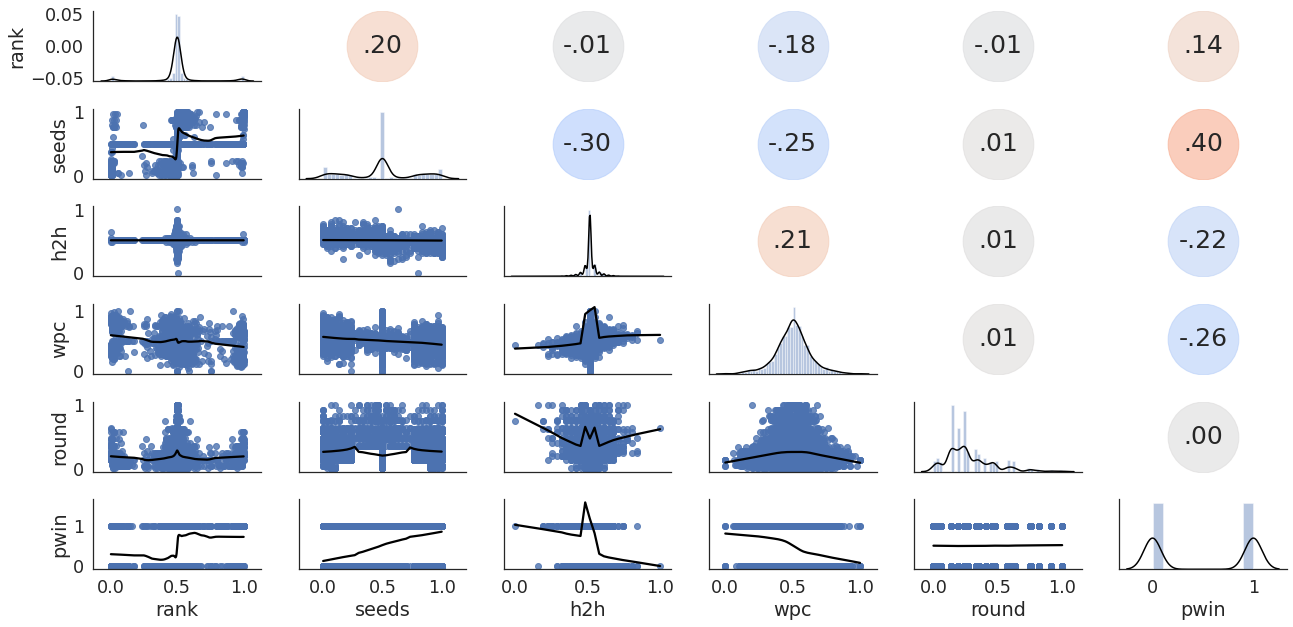

In [ ]:
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = 0.5 * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = 0.5 * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

sns.set(style='white', font_scale=1.6)
g = sns.PairGrid(normalize(train), aspect=2, height=1.5, diag_sharey=False)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black'})
g.map_diag(sns.distplot, kde_kws={'color': 'black'})
g.map_upper(corrdot)

* Training with Machine Learning Models

In [ ]:
models = [
       ('AdaBoostClassifier', AdaBoostClassifier()),
       ('XGBClassifier', xgb.XGBClassifier(verbose=False)),
       ('LGBMClassifier', lgb.LGBMClassifier()),
       ('RandomForest ',RandomForestClassifier()),
       ('Logistic Regression ',LogisticRegression()),
    ]

In [ ]:
def validate(models, X_train, y_train, X_test, y_test):
    model_data = []
        
    for name,curr_model in models :
        curr_model_data = {}
        curr_model_data["Name"] = name
        print(name)

        # X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=False)
        curr_model.fit(X_train, y_train)
        y_train_pred = curr_model.predict(X_train)
        y_test_pred = curr_model.predict(X_test)

        curr_model_data["test_accuracy"] = round((accuracy_score(y_test,y_test_pred))*100,3)
        curr_model_data["train_accuracy"] = round((accuracy_score(y_train,y_train_pred))*100,2)
        curr_model_data["test_f1"] = round((f1_score(y_test,y_test_pred, average='macro'))*100,2)
        curr_model_data["test_precision"] = round((precision_score(y_test,y_test_pred, average='macro'))*100,2)
        curr_model_data["test_recall"] = round((recall_score(y_test,y_test_pred, average='macro'))*100,2)

        model_data.append(curr_model_data)

    return pd.DataFrame(model_data)

In [ ]:
result = validate(models, train[x], train[y], val[x], val[y]).sort_values('test_accuracy',ascending=False)
result

AdaBoostClassifier
XGBClassifier
LGBMClassifier
RandomForest 
Logistic Regression 


,Name,test_accuracy,train_accuracy,test_f1,test_precision,test_recall
0,AdaBoostClassifier,73.064,70.53,73.05,73.11,73.07
1,XGBClassifier,72.948,72.08,72.93,73.00,72.95
2,LGBMClassifier,70.867,77.75,70.86,70.90,70.87
4,Logistic Regression,70.636,69.16,70.62,70.70,70.64
3,RandomForest,67.746,99.70,67.73,67.78,67.75


* Training with Evolutionary Algorithms using Interaction Terms

In [ ]:
def itr(X):
  subset = list(chain.from_iterable(combinations(x,n) for n in range(len(x)+1)))[6:-1]
  X1 = X.copy()
  for cols in subset:
    n = 1
    for col in cols: 
      n = n*np.array(X1[col])
    name = "*".join(cols)
    X1[name] = n
  return X1

In [ ]:
# Fitness Function: Binary Representation of features -> Logistic Regression
def fitness(bits, X_train, y_train, X_test, y_test):
	# Binary Transformation
  X_train = X_train[[X_train.columns[i] for i,bit in enumerate(bits) if bit==1]]
  X_test = X_test[[X_test.columns[i] for i,bit in enumerate(bits) if bit==1]]
	# Logistic Regression
  lr = LogisticRegression()
  lr.fit(X_train,y_train)
  return accuracy_score(y_test, lr.predict(X_test))*100

# Parent Selection: Tournament Selection
def selection(pop, scores, k=3):
	# first random selection
	selection_ix = randint(len(pop))
	for ix in randint(0, len(pop), k-1):
		# check if better (e.g. perform a tournament)
		if scores[ix] < scores[selection_ix]:
			selection_ix = ix
	return pop[selection_ix]

# Crossover: Diagonal Crossover
def crossover(p1, p2, p3, rate=0.75):
	# children are copies of parents by default
	c1, c2, c3= p1.copy(), p2.copy(), p3.copy()
	# check for recombination
	if rand() < rate:
		# select 2 crossover points that is not on the end of the string
		pt = sorted(randint(1, len(p1)-2, 2))
		# perform crossover
		c1 = p1[:pt[0]] + p2[pt[0]:pt[1]] + p3[pt[1]:]
		c2 = p2[:pt[0]] + p3[pt[0]:pt[1]] + p1[pt[1]:]
		c3 = p3[:pt[0]] + p1[pt[0]:pt[1]] + p2[pt[1]:]
	return [c1, c2, c3]

# Mutation: Bit Flip Mutation
def mutation(bitstring, rate=1/30):
	for i in range(len(bitstring)):
		# check for a mutation
		if rand() < rate:
			# flip the bit
			bitstring[i] = 1 - bitstring[i]

# Genetic Algorithm: Survivor Selection by Elitism
def genetic_algorithm(X_train, y_train, X_test, y_test, n_iter, n_pop):
	# initial population of random bitstring
	pop = [randint(0, 2, len(X_train.columns)).tolist() for _ in range(n_pop)]
	pop[0] = [1] * 5 + [0] * (len(X_train.columns)-5)
	# keep track of best solution
	best, best_eval = pop[0], fitness(pop[0], X_train, y_train, X_test, y_test)
	# enumerate generations
	for gen in range(n_iter):
		# evaluate all candidates in the population
		scores = [fitness(pop[0], X_train, y_train, X_test, y_test) for c in pop]
		# check for new best solution
		for i in range(n_pop):
			if scores[i] > best_eval:
				best, best_eval = pop[i], scores[i]
		print(">%d, gen best f(%s) = %.3f" % (gen,  best, best_eval))
		# select parents
		selected = [selection(pop, scores) for _ in range(n_pop-1)]
		# create the next generation
		children = list()
		for i in range(0, n_pop-1, 3):
			# get selected parents in pairs
			p1, p2, p3 = selected[i], selected[i+1], selected[i+2]
			# crossover and mutation
			for c in crossover(p1, p2, p3):
				# mutation
				mutation(c)
				# store for next generation
				children.append(c)
		# replace population with elitism
		pop = children + [best]
	return [best, best_eval]

# define the total iterations
n_iter = 100
# define the population size
n_pop = 10
# perform the genetic algorithm search
best, score = genetic_algorithm(itr(train[x]), train[y], itr(val[x]), val[y], n_iter, n_pop)
print('Done!')
print('f(%s) = %f' % (best, score))

>0, gen best f([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]) = 70.636
>1, gen best f([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]) = 70.636
>2, gen best f([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]) = 70.636
>3, gen best f([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]) = 70.636
>4, gen best f([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]) = 70.636
>5, gen best f([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]) = 70.636
>6, gen best f([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]) = 70.636
>7, gen best f([1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]) = 70.751
>8, gen best f([1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,

In [ ]:
# f([1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]) = 73.641618 -> cr 0.5 mr 1/30
# f([1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0]) = 73.179191 -> cr 0.75
itr_features = [itr(train[x]).columns[i] for i,bit in enumerate(best) if bit==1]
itr(train[x])[itr_features]

,rank,h2h,wpc,rank*h2h,rank*wpc,rank*round,seeds*h2h,seeds*round,rank*seeds*h2h,rank*h2h*wpc,seeds*h2h*wpc,seeds*h2h*round,seeds*wpc*round,rank*seeds*h2h*round,rank*h2h*wpc*round
0,1731,0,-0.750000,0,-1298.250000,1142460,0,0,0,-0.000000,-0.000000,0,-0.000000,0,-0.000000
1,-1692,0,-0.083333,0,141.000000,-1116720,0,0,0,-0.000000,-0.000000,0,-0.000000,0,-0.000000
2,-1502,0,0.666667,0,-1001.333333,-991320,0,0,0,0.000000,0.000000,0,0.000000,0,0.000000
3,-10,0,-0.166667,0,1.666667,-6600,0,-9240,0,-0.000000,-0.000000,0,1540.000000,0,-0.000000
4,-1984,0,0.702703,0,-1394.162162,-3313280,0,-25050,0,0.000000,0.000000,0,-17602.702703,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6911,4,-2,-0.057283,-8,-0.229133,25680,18,-57780,72,0.458265,-1.031097,115560,3309.819967,462240,2942.062193
6912,-14,0,0.065307,0,-0.914304,-89880,0,-83460,0,0.000000,0.000000,0,-5450.557502,0,0.000000
6913,9,-5,-0.141304,-45,-1.271739,70200,-65,101400,-585,6.358696,9.184783,-507000,-14328.260870,-4563000,49597.826087
6914,3,0,-0.028571,0,-0.085714,2640,0,0,0,-0.000000,-0.000000,0,-0.000000,0,-0.000000


# Evaluation

In [ ]:
result1 = validate(models, trainval[x], trainval[y], test[x], test[y])
result2 = validate([('Logistic Regression with Interaction Terms',LogisticRegression())], itr(trainval[x])[itr_features], trainval[y], itr(test[x])[itr_features], test[y])
pd.concat([result1,result2]).sort_values('test_accuracy',ascending=False)

AdaBoostClassifier
XGBClassifier
LGBMClassifier
RandomForest 
Logistic Regression 
Logistic Regression with Interaction Terms


,Name,test_accuracy,train_accuracy,test_f1,test_precision,test_recall
0,Logistic Regression with Interaction Terms,73.757,69.05,73.75,73.76,73.76
1,XGBClassifier,73.064,72.21,73.06,73.07,73.06
0,AdaBoostClassifier,72.601,70.57,72.60,72.60,72.60
2,LGBMClassifier,72.370,76.19,72.35,72.43,72.37
3,RandomForest,72.139,99.70,72.12,72.19,72.14
4,Logistic Regression,69.711,69.25,69.71,69.72,69.71


# *dumps*

In [ ]:
df.date = [datetime.strptime(x, "%m/%d/%Y") for x in df.date]
df.groupby(['tour','category'])['date'].max().sort_values()

tour                                                           category                      
PRINCESS SIRIVANNAVARI Thailand Masters 2018                   HSBC BWF World Tour Super 300    2018-01-14
PERODUA Malaysia Masters 2018                                  HSBC BWF World Tour Super 500    2018-01-21
DAIHATSU Indonesia Masters 2018                                HSBC BWF World Tour Super 500    2018-01-28
YONEX-SUNRISE DR. AKHILESH DAS GUPTA India Open 2018           HSBC BWF World Tour Super 500    2018-02-04
YONEX Swiss Open 2018                                          HSBC BWF World Tour Super 300    2018-02-25
YONEX German Open 2018                                         HSBC BWF World Tour Super 300    2018-03-11
YONEX All England Open 2018                                    HSBC BWF World Tour Super 1000   2018-03-18
BARFOOT & THOMPSON New Zealand Open 2018                       HSBC BWF World Tour Super 300    2018-05-06
CROWN GROUP Australian Open 2018                  

In [ ]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [ ]:
def itr(X):
  subset = list(chain.from_iterable(combinations(x,n) for n in range(len(X.columns)+1)))[6:-1] # 1: with pow2, 6: without pow2
  X1 = X.copy()
  for cols in subset:
    if len(cols) == 1:
      n = [] 
      for i in X1[cols[0]]:
        if i>=0:
          i = i**2
        else:
          i = (i**2)
        n.append(i)
      name = cols[0] + '2'
      X1[name] = n
    else:
      n = 1
      for col in cols: n = n*np.array(X1[col])
      name = ":".join(cols)
      X1[name] = n
    
  return X1

In [ ]:
models = [
       ('AdaBoostClassifier', AdaBoostClassifier()),
       ('XGBClassifier', xgb.XGBClassifier(verbose=False)),
       ('LGBMClassifier', lgb.LGBMClassifier()),
       ('RandomForest ',RandomForestClassifier()),
       ('Logistic Regression ',LogisticRegression()),
    ]

def validate(X_train, y_train, X_test, y_test):
    # if (type(X_train) == pd.core.frame.DataFrame): X_train = X_train.values
    # if (type(y_train) == pd.core.frame.DataFrame): y_train = y_train.values
    # if (type(X_test) == pd.core.frame.DataFrame): X_test = X_test.values
    # if (type(y_test) == pd.core.frame.DataFrame): y_test = y_test.values

    model_data = []
    # scoring = {'accuracy': 'accuracy',
    #            'f1': make_scorer(f1_score, average='macro'),
    #            'precision': make_scorer(precision_score, average='macro'),
    #            'recall': make_scorer(recall_score, average='macro')
    #            }
        
    for name,curr_model in models :
        curr_model_data = {}
        curr_model_data["Name"] = name
        print(name)

        # X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=False)
        curr_model.fit(X_train, y_train)
        # if name == 'Logistic Regression ':
        #   print(curr_model.coef_)
        y_train_pred = curr_model.predict(X_train)
        y_test_pred = curr_model.predict(X_test)

        curr_model_data["test_accuracy"] = round((accuracy_score(y_test,y_test_pred))*100,2)
        curr_model_data["train_accuracy"] = round((accuracy_score(y_train,y_train_pred))*100,2)
        curr_model_data["test_f1"] = round((f1_score(y_test,y_test_pred, average='macro'))*100,2)
        curr_model_data["test_precision"] = round((precision_score(y_test,y_test_pred, average='macro'))*100,2)
        curr_model_data["test_recall"] = round((recall_score(y_test,y_test_pred, average='macro'))*100,2)

        # skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=99)
        # scores = cross_validate(curr_model, X, y, scoring=scoring, #'f1', 'precision', 'recall'
        # cv=skf, return_train_score=True)

        # curr_model_data["test_accuracy"] = round(np.mean(scores['test_accuracy'])*100,2)
        # curr_model_data["train_accuracy"] = round(np.mean(scores['train_accuracy'])*100,2)
        # curr_model_data["test_f1"] = round(np.mean(scores['test_f1'])*100,2)
        # curr_model_data["test_precision"] = round(np.mean(scores['test_precision'])*100,2)
        # curr_model_data["test_recall"] = round(np.mean(scores['test_recall'])*100,2)

        model_data.append(curr_model_data)

    return pd.DataFrame(model_data)

In [ ]:
# f([1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]) = 73.641618 -> cr 0.5 mr 1/30
# f([1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0]) = 73.179191 -> cr 0.75